<a href="https://colab.research.google.com/github/tenacioussami/Machine-learning-/blob/main/Clustering_Techniques_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install -q -U matplotlib seaborn pandas scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the Mall Customer Segmentation dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Research_through_Data_Science/Class_11/Mall_Customers.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
Mounted at /content/drive


# Data Preprocessing and Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


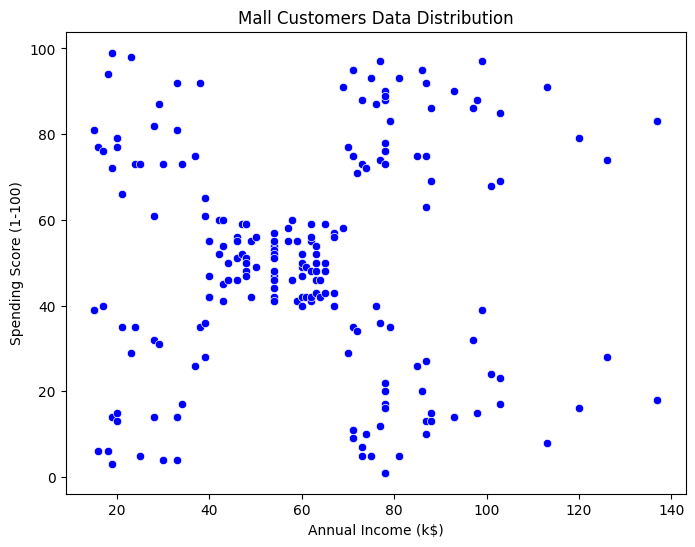

In [ ]:
# Show the first few rows of the dataset
df.head()

# Explore the dataset - check for missing values and basic info
df.info()

# Selecting relevant columns for clustering (Annual Income and Spending Score)
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Check for null values
df.isnull().sum()

# Standardize the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Visualize the data distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], color='blue')
plt.title('Mall Customers Data Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# K-means clustering

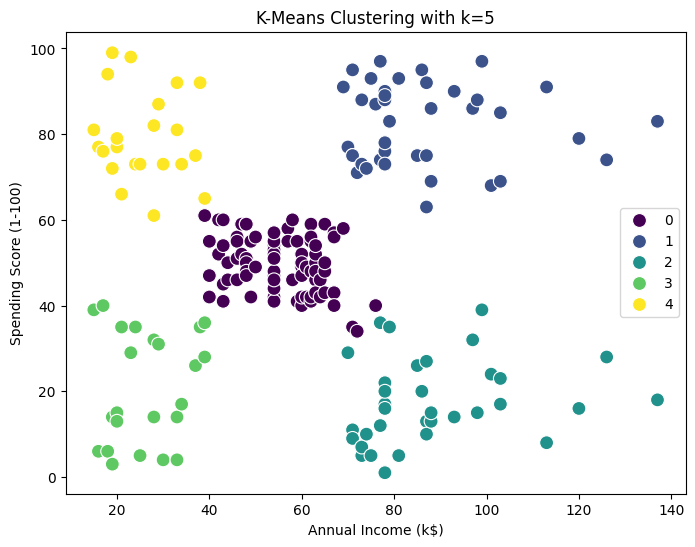

In [ ]:
# --- K-Means Clustering ---
from sklearn.cluster import KMeans
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=20)
kmeans.fit(df_scaled)

# Visualize the K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=kmeans.labels_, palette='viridis', s=100)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hierarchical Clustering

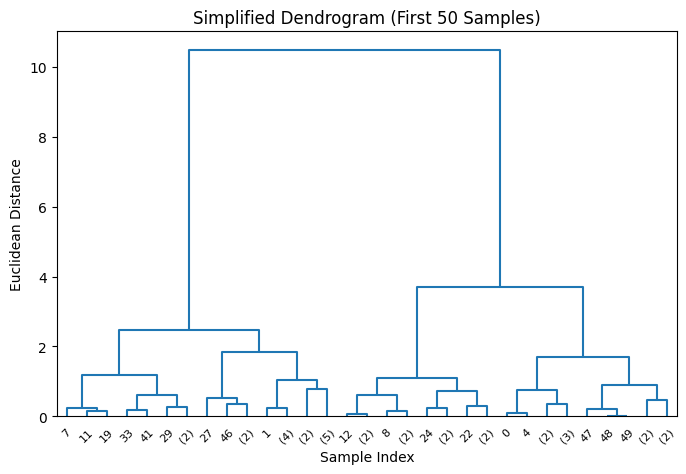

In [ ]:
# --- Hierarchical Clustering (Simplified Dendrogram) ---
# Use a subset of the data to keep visualization readable
from scipy.cluster.hierarchy import dendrogram, linkage
sample_data = df_scaled[:50]  # taking first 50 samples

# Create linkage matrix
linked = linkage(sample_data, method='ward')

# Plot the simplified dendrogram
plt.figure(figsize=(8, 5))
dendrogram(
    linked,
    truncate_mode='level',  # show only top levels of the tree
    p=4,                    # show last 4 merges
    color_threshold=0
)
plt.title('Simplified Dendrogram (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


# Comparison between K-means and Hierarchical

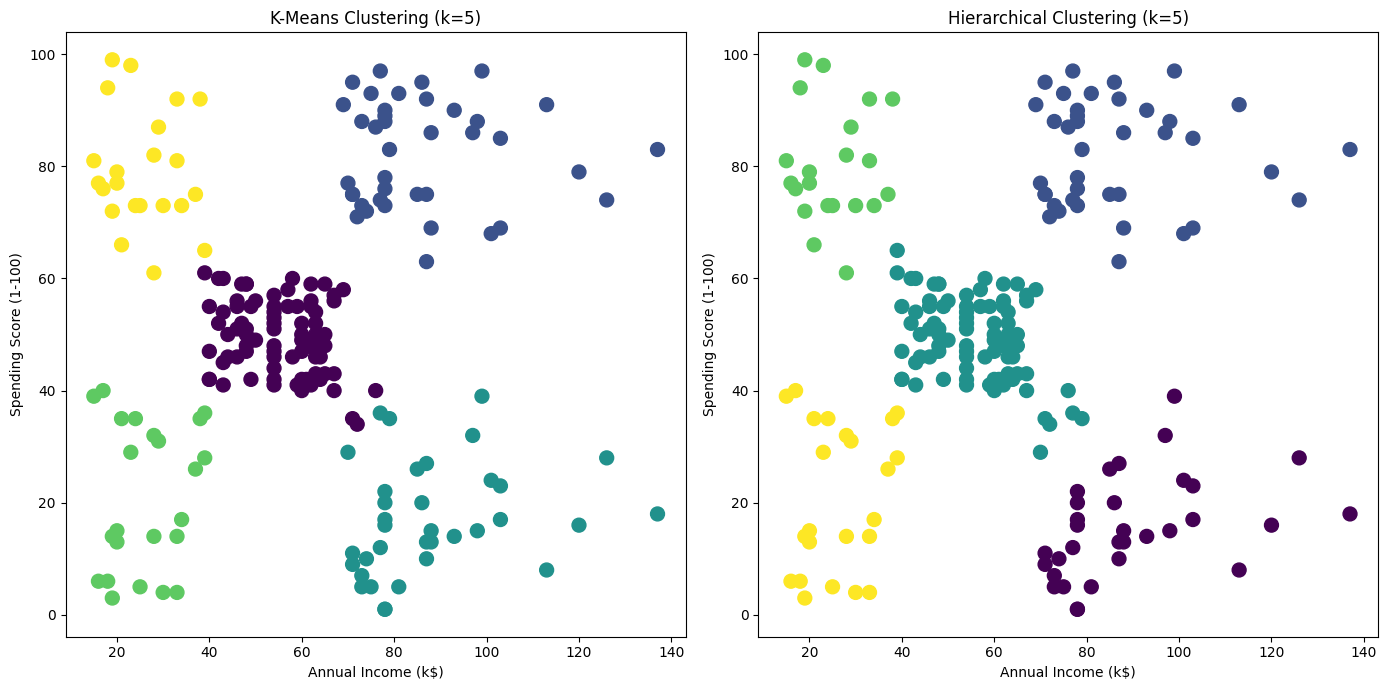

In [ ]:
# Apply Agglomerative Clustering (Hierarchical) with k=5
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hierarchical.fit_predict(df_scaled)

# Plot the comparison of K-Means and Hierarchical Clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# K-Means plot
ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis', s=100)
ax1.set_title(f'K-Means Clustering (k={optimal_k})')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')

# Hierarchical plot
ax2.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_hc, cmap='viridis', s=100)
ax2.set_title('Hierarchical Clustering (k=5)')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Assignment

1. Load and Preprocess the Data:

Load the Socio-Economic Factors and Income Dataset.

Clean the data by handling missing values.

Encode the Education Level (categorical feature).

Standardize the numerical features (Age and Income) to ensure fair clustering.

2. Apply K-Means Clustering:

Use K-Means to segment the data into 5 clusters based on Age, Income, and Education Level.

Visualize the resulting clusters using a scatter plot of Income vs. Age, with color coding for the clusters.

Identify and interpret the characteristics of each cluster.

3. Apply Hierarchical Clustering:

Use Hierarchical Clustering (Agglomerative) with 5 clusters.

Visualize the dendrogram to understand the hierarchy of the clusters.

Compare the Hierarchical Clustering results with K-Means.